In [1]:
import onnxruntime as ort

def inspect_onnx_model(onnx_model_path):
    session = ort.InferenceSession(onnx_model_path, providers=['CPUExecutionProvider'])

    print("Model Inputs:")
    for input in session.get_inputs():
        print(f"Name: {input.name}, Shape: {input.shape}, Type: {input.type}")

    print("\nModel Outputs:")
    for output in session.get_outputs():
        print(f"Name: {output.name}, Shape: {output.shape}, Type: {output.type}")

inspect_onnx_model(r"Best models\model.onnx")


Model Inputs:
Name: onnx::Gemm_0, Shape: [1, 128], Type: tensor(float)

Model Outputs:
Name: 85, Shape: [1, 1, 128, 128], Type: tensor(float)


In [2]:
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt

def generate_images(onnx_model_path):
    session = ort.InferenceSession(onnx_model_path, providers=['CPUExecutionProvider'])
    
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    
    noise = np.random.randn(1, 128).astype(np.float32)
    
    generated_image = session.run([output_name], {input_name: noise})[0]
    
    generated_image = (generated_image.squeeze().squeeze() + 1) / 2

    plt.imshow(generated_image, cmap = 'grey')
    plt.axis('off')
    plt.show()


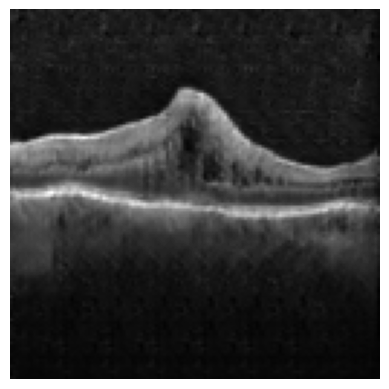

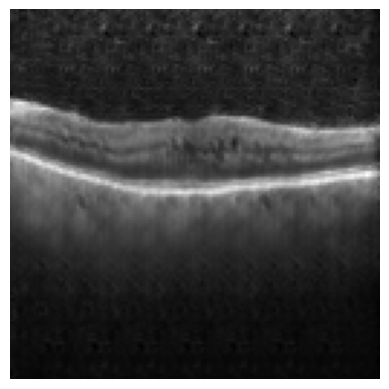

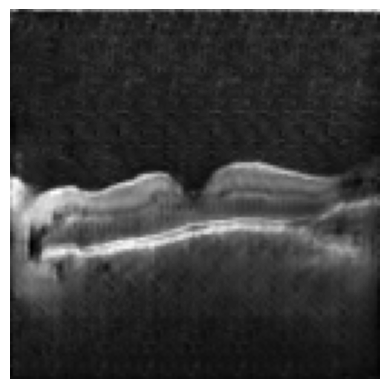

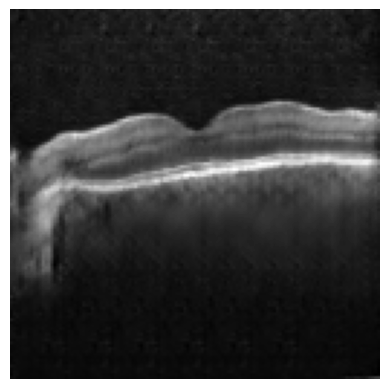

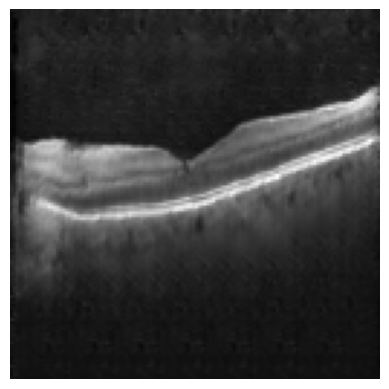

In [5]:
for i in range(5):
    generate_images(r"Best models\model.onnx")